In [1]:
# Importing required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
import warnings
from joblib import Parallel, delayed

# Suppressing warnings
warnings.filterwarnings('ignore')

# Enable Plotly for offline mode
py.init_notebook_mode(connected=True)

In [2]:
# Load the dataset
file_path = r'/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
data = pd.read_excel(file_path)

In [3]:
# Function to preview data with insights on missing values and dtype
def preview_data(df, rows=5):
    """Display the first few rows and provide data quality insights."""
    print(f"\nPreviewing first {rows} rows of the dataset:\n")
    print(df.head(rows))

    # Check for missing values and data types
    missing_values = df.isnull().sum()
    print(f"\nData Overview:\nShape: {df.shape}")
    print(f"\nMissing Values:\n{missing_values[missing_values > 0]}")
    print(f"\nData Types:\n{df.dtypes}")

In [4]:
# Preview data
preview_data(data)


Previewing first 5 rows of the dataset:

  EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                     

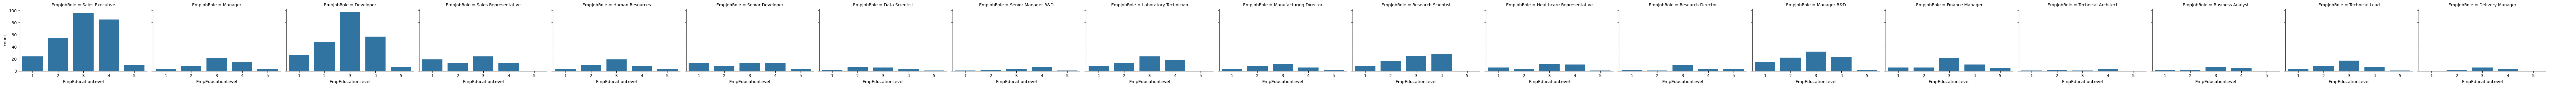

In [5]:
def plot_categorical_facet_grid(data, feature, col, row=None):
    """Plot a categorical feature count with Facet Grid."""
    grid = sns.FacetGrid(data, col=col, row=row, height=3, aspect=1.5)
    grid.map(sns.countplot, feature)

    grid.add_legend()
    plt.show()

# Example: Plotting EmpEducationLevel by EmpJobRole
plot_categorical_facet_grid(data, feature='EmpEducationLevel', col='EmpJobRole')


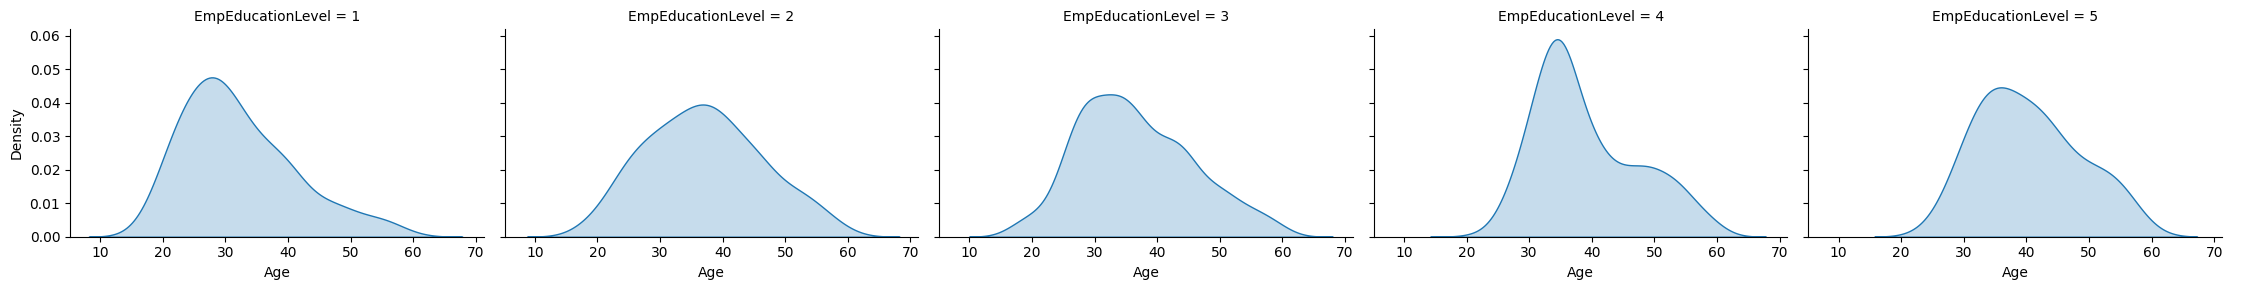

In [6]:
def plot_numerical_categorical_facet_grid(data, numerical_feature, categorical_feature, row=None, col=None):
    """Create a Facet Grid with KDE or Box plots for numerical and categorical feature interaction."""
    grid = sns.FacetGrid(data, row=row, col=col, height=3, aspect=1.5)
    grid.map(sns.kdeplot, numerical_feature, fill=True)

    grid.add_legend()
    plt.show()

# Example: Age distribution by EmpJobRole and EmpEducationLevel
plot_numerical_categorical_facet_grid(data, numerical_feature='Age', categorical_feature='EmpJobRole', col='EmpEducationLevel')


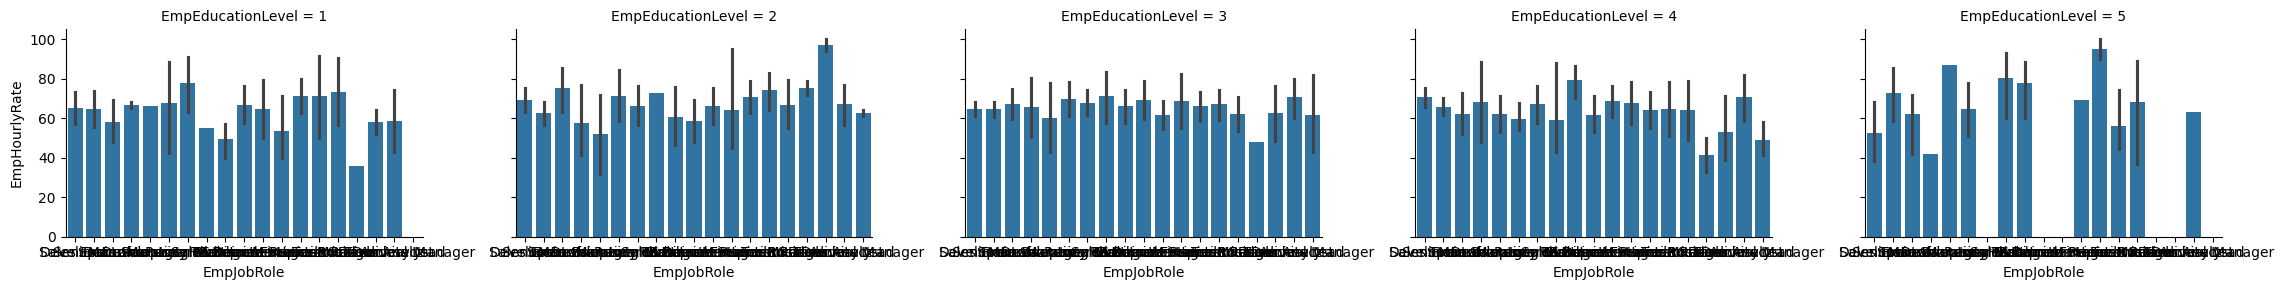

In [7]:
def plot_bar_facet_grid(data, numerical_feature, categorical_feature, col, row=None):
    """Facet Grid with Barplot for numerical and categorical feature interaction."""
    grid = sns.FacetGrid(data, col=col, row=row, height=3, aspect=1.5)
    grid.map(sns.barplot, categorical_feature, numerical_feature)

    grid.add_legend()
    plt.show()

# Example: Average EmpHourlyRate by EmpJobRole across different EmpEducationLevel
plot_bar_facet_grid(data, numerical_feature='EmpHourlyRate', categorical_feature='EmpJobRole', col='EmpEducationLevel')


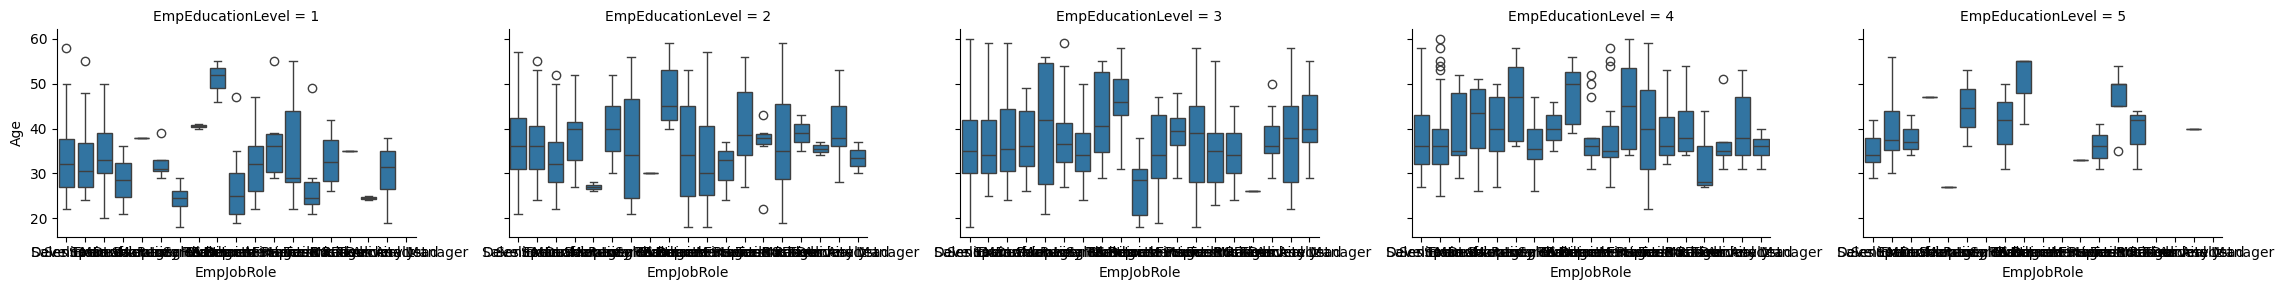

In [8]:
def plot_box_facet_grid(data, numerical_feature, categorical_feature, col, row=None):
    """Facet Grid with Boxplot for numerical and categorical feature interaction."""
    grid = sns.FacetGrid(data, col=col, row=row, height=3, aspect=1.5)
    grid.map(sns.boxplot, categorical_feature, numerical_feature)

    grid.add_legend()
    plt.show()

# Example: Boxplot of Age across different EmpJobRole
plot_box_facet_grid(data, numerical_feature='Age', categorical_feature='EmpJobRole', col='EmpEducationLevel')


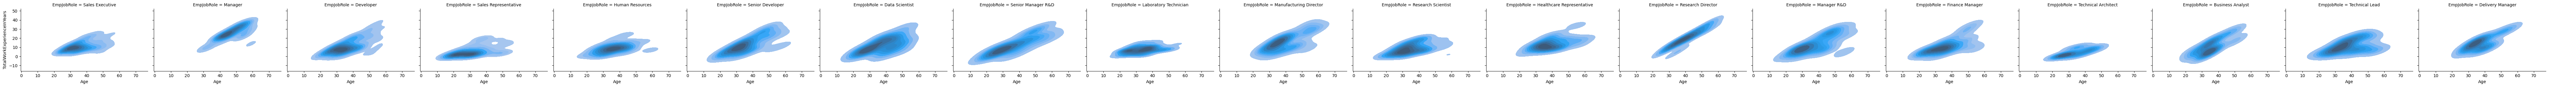

In [9]:
def plot_kde_pairwise_facet_grid(data, numerical_feature_1, numerical_feature_2, col=None, row=None):
    """Facet Grid with pairwise KDE plot for two numerical features."""
    grid = sns.FacetGrid(data, col=col, row=row, height=3, aspect=1.5)
    grid.map(sns.kdeplot, numerical_feature_1, numerical_feature_2, fill=True)

    grid.add_legend()
    plt.show()

# Example: KDE Plot of Age vs. TotalWorkExperienceInYears across EmpJobRole
plot_kde_pairwise_facet_grid(data, 'Age', 'TotalWorkExperienceInYears', col='EmpJobRole')


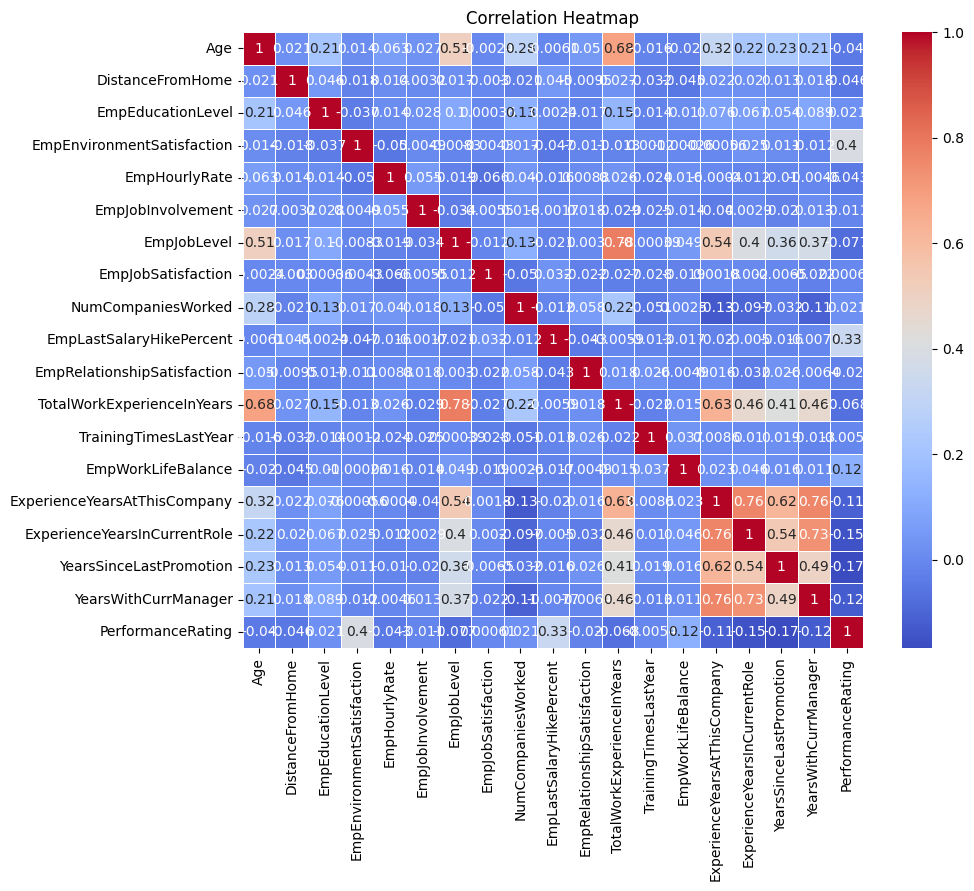

In [10]:
def plot_simple_heatmap(data):
    """Plot a basic correlation heatmap using Seaborn."""
    numerical = data.select_dtypes(include=[np.number]).columns.tolist()
    corr_matrix = data[numerical].astype(float).corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

# Call the simpler heatmap function
plot_simple_heatmap(data)

In [11]:
# Custom Summary Statistics with Parallel Processing for Efficiency
def custom_summary_statistics(df):
    """Function to calculate custom statistics, including distribution and variation, in parallel."""

    # Function to compute statistics for a single column
    def compute_stats(column):
        stats = {
            'mean': column.mean(),
            'std_dev': column.std(),
            'min': column.min(),
            'max': column.max(),
            'missing': column.isnull().sum()
        }
        return stats

    # Parallel processing for numerical features
    numerical_features = df.select_dtypes(include=[np.number])

    stats_dict = Parallel(n_jobs=-1)(delayed(compute_stats)(numerical_features[col]) for col in numerical_features)

    # Display summary stats in a table format
    stats_df = pd.DataFrame(stats_dict, index=numerical_features.columns)
    print(f"\nCustom Summary Statistics:\n{stats_df}")

# Display summary statistics
custom_summary_statistics(data)



Custom Summary Statistics:
                                   mean    std_dev  min  max  missing
Age                           36.918333   9.087289   18   60        0
DistanceFromHome               9.165833   8.176636    1   29        0
EmpEducationLevel              2.892500   1.044120    1    5        0
EmpEnvironmentSatisfaction     2.715833   1.090599    1    4        0
EmpHourlyRate                 65.981667  20.211302   30  100        0
EmpJobInvolvement              2.731667   0.707164    1    4        0
EmpJobLevel                    2.067500   1.107836    1    5        0
EmpJobSatisfaction             2.732500   1.100888    1    4        0
NumCompaniesWorked             2.665000   2.469384    0    9        0
EmpLastSalaryHikePercent      15.222500   3.625918   11   25        0
EmpRelationshipSatisfaction    2.725000   1.075642    1    4        0
TotalWorkExperienceInYears    11.330000   7.797228    0   40        0
TrainingTimesLastYear          2.785833   1.263446    0    6  

In [12]:
# Function to normalize numerical features for improved model performance
def normalize_data(df, features):
    """Normalize selected numerical features using StandardScaler."""

    scaler = StandardScaler()
    df[features] = scaler.fit_transform(df[features])

    return df

# Normalizing selected features
numerical_features = ['Age', 'EmpHourlyRate', 'TotalWorkExperienceInYears']
data = normalize_data(data, numerical_features)

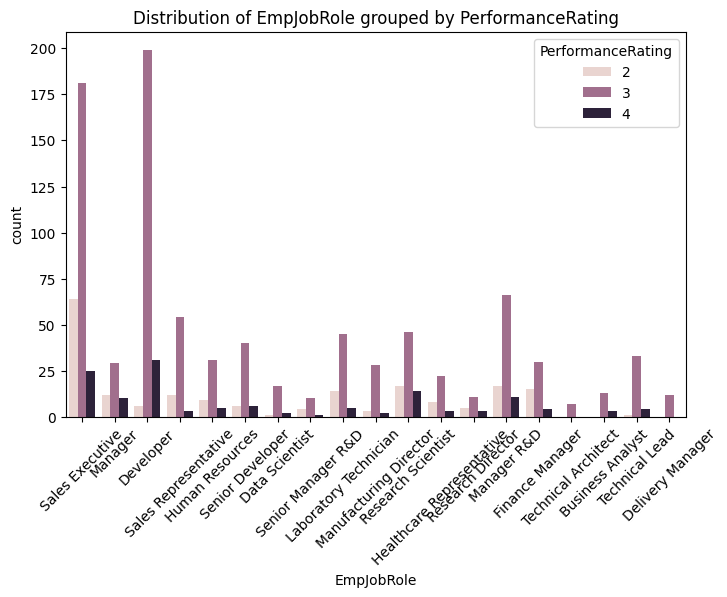

In [13]:
# Function to plot bar charts for categorical features
def plot_categorical_distribution(df, feature, target=None):
    """Function to visualize the distribution of a categorical feature, optionally grouped by target."""
    plt.figure(figsize=(8, 5))

    if target:
        sns.countplot(data=df, x=feature, hue=target)
        plt.title(f"Distribution of {feature} grouped by {target}")
    else:
        sns.countplot(data=df, x=feature)
        plt.title(f"Distribution of {feature}")

    plt.xticks(rotation=45)
    plt.show()

# Example: Visualizing Job Role distribution
plot_categorical_distribution(data, feature='EmpJobRole', target='PerformanceRating')

In [14]:
# Function to fill missing values based on column type
def fill_missing_values(df):
    """Impute missing values in the dataset."""
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    print("Missing values handled successfully!")
    return df

# Fill missing values
data = fill_missing_values(data)

Missing values handled successfully!


In [15]:
# Function to detect outliers using IQR
def detect_outliers(df, feature):
    """Detect outliers in a feature using the IQR method."""
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"\nOutliers detected in {feature}:\n", outliers)
    return outliers

# Detect outliers in 'EmpHourlyRate'
outliers = detect_outliers(data, 'EmpHourlyRate')



Outliers detected in EmpHourlyRate:
 Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]


In [16]:
# Function to perform a chi-squared test for categorical variables
def chi_squared_test(df, feature, target):
    """Perform a chi-squared test to check correlation between a categorical feature and the target."""
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    print(f"Chi-squared test for {feature} and {target}:")
    print(f"Chi2: {chi2}, p-value: {p}")

# Example usage: Check correlation between 'EmpJobRole' and 'PerformanceRating'
chi_squared_test(data, 'EmpJobRole', 'PerformanceRating')


Chi-squared test for EmpJobRole and PerformanceRating:
Chi2: 97.74068757227447, p-value: 1.3110599924510437e-07


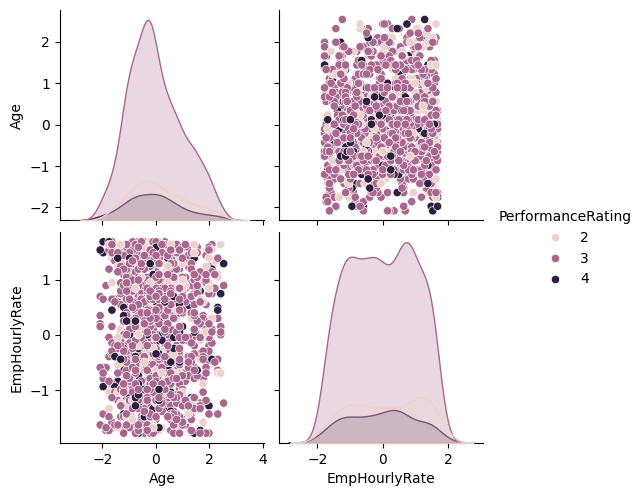

In [17]:
# Pair plot for selected features
def pair_plot(df, features, target=None):
    """Function to create pair plots for the selected numerical features."""
    sns.pairplot(df[features + [target]], hue=target)
    plt.show()

# Pair plot between Age, HourlyRate, and PerformanceRating
pair_plot(data, ['Age', 'EmpHourlyRate'], target='PerformanceRating')

The notebook is designed to provide deep insights into the dataset through a combination of exploratory data analysis (EDA), data preprocessing, and statistical analysis. Below are the key insights you can derive from it:

1. **Data Overview**

**Preview of the Data:** The notebook offers a quick look at the first few rows of the dataset along with missing values and data types. This helps in understanding the structure and quality of the data.

**Missing Values Handling:** A function is included to fill missing values based on the type of data (mean for numerical and mode for categorical features).

2. **Data Visualizations**

**Facet Grid Plots:**

**Categorical Features:** Distributions of categorical features like EmpEducationLevel and EmpJobRole provide insights into how the workforce is distributed across different roles and education levels.

**Numerical Features with Categorical Context:** KDE and Box plots are used to analyze how numerical features like Age or EmpHourlyRate vary across different categories such as EmpJobRole and EmpEducationLevel. These visualizations help identify trends, such as whether certain job roles are held by employees of a particular age group or education level.

**Bar Plots:** Average numerical values across categories (e.g., average hourly rates across job roles) provide actionable insights about the distribution of salaries, age, or other numerical values among different groups.

**Pairwise KDE:** Relationships between numerical features (e.g., Age and TotalWorkExperienceInYears) can reveal patterns that are difficult to see with single-variable plots.

**Correlation Heatmap:**

Shows the linear relationships between numerical variables. This can help identify highly correlated features, which might be useful for feature selection in machine learning models. For instance, if Age and Experience are highly correlated, one could be dropped in a predictive model.

3. **Statistical Analysis**

**Custom Summary Statistics:** Provides detailed statistics (mean, standard deviation, min, max, and missing values) for numerical features, giving a clear picture of the central tendency and spread of the data.

**Chi-Squared Test:** This test helps identify whether there's a statistically significant relationship between categorical features and the target variable (e.g., EmpJobRole and PerformanceRating). It can help in understanding how different job roles influence employee performance.

**Outlier Detection:** By using the Interquartile Range (IQR) method, this function detects outliers in numerical features such as EmpHourlyRate. Identifying outliers can help in deciding whether to remove or treat them before modeling.

4. **Data Normalization**

**Feature Scaling:** Numerical features like Age, EmpHourlyRate, and TotalWorkExperienceInYears are normalized using StandardScaler to improve model performance, especially for algorithms sensitive to feature scaling, such as support vector machines (SVMs) or neural networks.

5. **Insights from Pair Plots**

Pair Plots: These give insights into how numerical features are related to each other and the target variable (e.g., PerformanceRating). Patterns, clusters, or relationships between features can provide clues for predictive modeling.

6. **Categorical Distribution**

**Distribution and Comparison:** You can easily visualize the distribution of categorical variables and compare how different categories influence a target variable (e.g., how EmpJobRole influences PerformanceRating).

**Overall Insights**

**Trends in Workforce:** Through visualizations like bar plots, box plots, and facet grids, you can identify trends in employee attributes such as education, experience, job roles, and performance ratings.

**Feature Correlations:** The correlation heatmap and chi-squared test offer insights into which features have strong relationships, allowing you to make informed decisions about feature engineering or selection.

**Outlier Analysis:** Outliers are detected and can be further examined to determine if they should be treated, helping to improve the quality of the dataset before modeling.